"I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work."

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import random

In [95]:
grid = np.zeros((4, 4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]


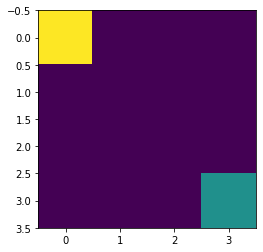

In [96]:
#Starting position
pos1 = [0, 0]

#terminal position
pos2 = [3, 3]

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

print(grid)
plt.imshow(grid)
plt.show()

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

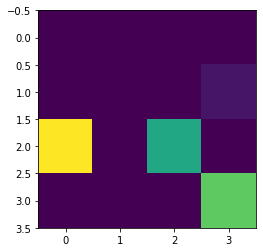

<IPython.core.display.Javascript object>

In [97]:
output_grid = widgets.Grid(1,1)
for _ in range(15):
  grid = np.zeros((4, 4))
  grid[np.random.randint(3), np.random.randint(3)] = 1
  grid[3,3]=0.75
  grid[2,2]=0.6
  grid[1,3]=.055
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

In [98]:
class GridEnvironment(gym.Env):

  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 15

  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.inter_pos=[2,2]
    self.inter_pos2=[0,3]
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.75
    self.state[tuple(self.inter_pos)]=0.4
    self.state[tuple(self.inter_pos2)]=0.7

    observation = self.state.flatten()

    return observation

  def step(self, action):
    randomN = np.random.random(1)[0]
    direction = -1
    if randomN>.4:
        direction  = +1
    if action == 0:
        self.agent_pos[0] += direction*1
    elif action == 1:
        self.agent_pos[0] -= direction*1
    elif action == 2:
        self.agent_pos[1] += direction*1
    elif action == 3:
        self.agent_pos[1] -= direction*1
    
    #Define the clipping boundary

    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = 0
    if (self.agent_pos == self.goal_pos).all():
      reward = 1
    
    elif (self.agent_pos == self.inter_pos).all():
      reward =+0.85

    elif (self.agent_pos == self.inter_pos2).all():
      reward=-0.5
      self.timestep += 1
    done = True if self.timestep >= self.max_timesteps else False
    statusus = {}

    return observation, reward, done, status

  def render(self):
    plt.imshow(self.state)

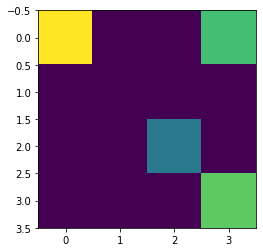

In [99]:
env = GridEnvironment()
obs = env.reset()
env.render()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

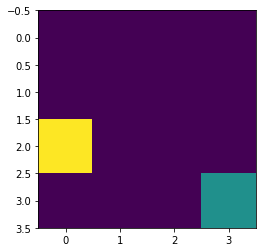

<IPython.core.display.Javascript object>

In [100]:
action = 2
reward = 0
for action in [1,0,1,2,3,3,3,3,1,1,1,2,2,2,0,0,0,0]:
  obs, reward, done, _ = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)
#print('Reward: ', reward)

,,,
,,,
,,,
,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

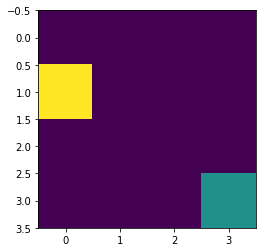

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

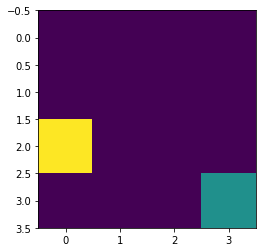

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

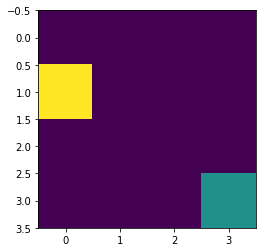

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

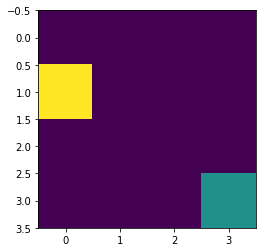

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

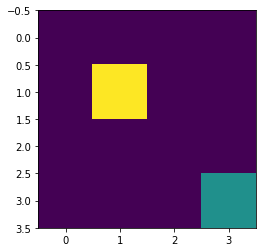

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

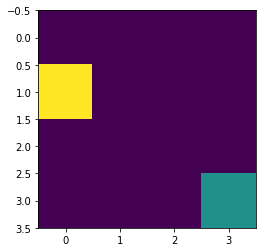

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

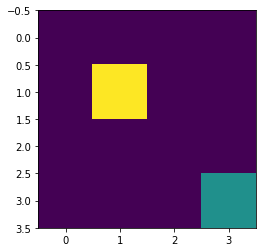

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

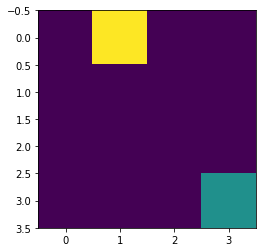

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

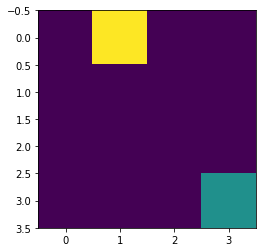

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

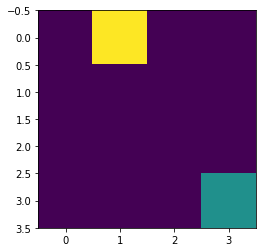

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

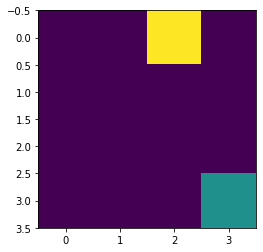

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

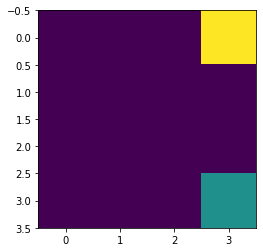

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

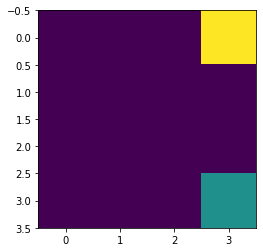

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

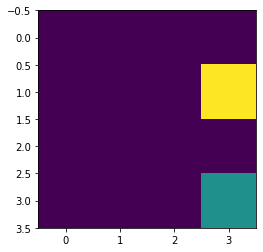

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

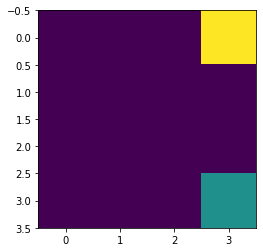

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

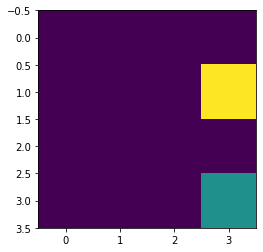

<IPython.core.display.Javascript object>

Total Reward accumulated  -1.5


In [101]:
action = 2
reward2 = 0
output_grid = widgets.Grid(4,4)
row=0
col=0
for action in [1,0,1,2,3,3,3,1,1,1,2,2,2,0,0,0,0,0]:
  obs, reward, done, _ = env.step(action)
  reward2+=reward
  with output_grid.output_to(row, col):
    output_grid.clear_cell()
    env.render()
  col+=1
  if col>3:
      col = 0
      row+=1
  if row>3:
      break
  time.sleep(1)
print('Total Reward accumulated ', reward2)

# Part 2

In [180]:
env_obj = GridEnvironment(0.3,0.9,0.01,0.2)
obs = env.reset()
print(env_obj.rows,env_obj.cols)
print(env_obj.Q_table)
print("Parameters","Alpha",env_obj.alpha,"Gamma",env_obj.gamma,"Epsilon",env_obj.epsilon,"Epsilon_Decay",env_obj.epsilonDecay)
print("Is Stochastic",env_obj.is_stochastic)

gamma or discount factor we are using 0.3
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.2
we will train for  50  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
4 4
{(0, 0): [0, 0, 0, 0], (0, 1): [0, 0, 0, 0], (0, 2): [0, 0, 0, 0], (0, 3): [0, 0, 0, 0], (1, 0): [0, 0, 0, 0], (1, 1): [0, 0, 0, 0], (1, 2): [0, 0, 0, 0], (1, 3): [0, 0, 0, 0], (2, 0): [0, 0, 0, 0], (2, 1): [0, 0, 0, 0], (2, 2): [0, 0, 0, 0], (2, 3): [0, 0, 0, 0], (3, 0): [0, 0, 0, 0], (3, 1): [0, 0, 0, 0], (3, 2): [0, 0, 0, 0], (3, 3): [0, 0, 0, 0]}
Parameters Alpha 0.2 Gamma 0.3 Epsilon 0.9 Epsilon_Decay 0.01
Is Stochastic False


In [179]:
class GridEnvironment(gym.Env):

    def __init__(self, gamma, epsilon, epsilonDecay, alpha, num_episodes = 50, max_timesteps = 25, is_stochastic = False,count=0):

        
        self.event = []
        self.count=0

        self.gamma = gamma
        print("gamma or discount factor we are using",self.gamma)
        self.epsilon = epsilon
        print("epsilon or degree of randomness we are using",self.epsilon)
        self.epsilonDecay = epsilonDecay
        print("As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value ")
        print("epsilon decay we are using is ",self.epsilon)

        self.alpha = alpha
        print("Learning rate alpha we are using is",self.alpha)
        self.num_episodes = num_episodes
        self.max_timesteps = max_timesteps
        print("we will train for ",self.num_episodes," and the max actions in a episode berfore termination is",max_timesteps)
        self.is_stochastic = is_stochastic
        self.cumulativeReward = 0
        self.done = False

        #Grid world of size 4x4
        self.rows=4
        self.cols=4

        self.total_states = spaces.Discrete(4*4)
        self.actions = {"UP":0, "RIGHT":1, "DOWN":2,"LEFT":3}
        self.max_timesteps = max_timesteps
        self.state = np.zeros((4, 4))
        print(self.state)
        self.timestep = 0

        #Starting, ending positions and rward positons
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.red_flag = [1,1]
        self.inter_reward = [0,3]
        self.inter_reward2=[2,2]
        self.reward_positions = set()
        self.reward_positions.add(tuple(self.goal_pos)) 
        self.reward_positions.add(tuple(self.red_flag))
        self.reward_positions.add(tuple(self.inter_reward))

        self.re_d=[]
        self.reward = dict()
        self.reward[tuple(self.goal_pos)] = 1
        self.re_d=[1,-1.5,1,2.5]
        self.reward[tuple(self.red_flag)] = -1.5
        self.reward[tuple(self.inter_reward)] = 1
        self.reward[tuple(self.inter_reward2)] = 2.5
        #print("Our Rewards corresponding to different states",reward)

    
        # We have one red flag and 2 intermmidiate rewards
        self.state_pair_changes=[]
        self.state=dict()
        self.state[tuple(self.agent_pos)] = 2
        self.state[tuple(self.goal_pos)] = 1
        self.state[tuple(self.red_flag)] = -1.5
        self.state[tuple(self.inter_reward)] = 1.5
        self.state[tuple(self.inter_reward2)]=2.5
        


        #Q table init
        self.Q_table = dict()
        for i in range(4):
            for j in range(4):
                self.Q_table[tuple([i,j])] = [0,0,0,0]
    
    #Reset is called after every episode
    def reset(self):
        #print("Episode ends")
        self.count+=1
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.red_flag = [1,1]
        self.inter_reward = [0,3]
        self.inter_reward2 = [2,2]
        self.state = np.zeros((4, 4))

        self.state[tuple(self.agent_pos)] = 2
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.inter_reward)] = 1.5
        self.state[tuple(self.inter_reward2)]=2.5
        self.state[tuple(self.red_flag)] = -1.5

        self.cumulativeReward = 0
        self.event = []

        observation = self.state.flatten()
        return observation


    def st_step(self):
        self.timestep +=1
        if self.is_stochastic:
            actionAvailable = self.possible_actions(self.agent_pos)
            stateAvailable = self.getAllFinalPosition(actionAvailable)
            finalaction, finalstate = self.get_state_action(actionAvailable, stateAvailable)
            finalaction, finalstate = self.finalStochasticActionStatePair(finalaction, finalstate, actionAvailable, stateAvailable)
            self.agent_pos = finalstate
            self.event.append([finalstate, finalaction, self.getReward(self.agent_pos)])
            self.cumulativeReward+=self.getReward(self.agent_pos)
            self.state = np.zeros((self.rows, self.cols))
            
            self.state[tuple(self.agent_pos)] = 2
            self.state[tuple(self.goal_pos)] = 1
            self.state[tuple(self.inter_reward)] = 1.5
            self.state[tuple(self.inter_reward2)]=2.5     
            self.state[tuple(self.red_flag)] = -1.5


            if self.time_steps>self.max_timesteps or (self.agent_pos == self.goal_pos):
                self.done = True
                #Episode done       
            
            return self.state.flatten(), self.cumulativeReward, self.done, self.timestep

        else:
            actionAvailable = self.possible_actions(self.agent_pos)
            stateAvailable = self.getAllFinalPosition(actionAvailable)
            finalaction, finalstate = self.get_state_action(actionAvailable, stateAvailable)
            self.agent_pos = finalstate
            self.event.append([finalstate, finalaction, self.getReward(self.agent_pos)])
            self.cumulativeReward+=self.getReward(self.agent_pos)
            self.state = np.zeros((self.rows, self.cols))
            self.state[tuple(self.agent_pos)] = 2
            self.state[tuple(self.goal_pos)] = 0.5
            self.state[tuple(self.red_flag)] = 1
            self.state[tuple(self.inter_reward)] = 1.5
            self.state[tuple(self.inter_reward)] = 2.5      

            if self.timestep>self.max_timesteps or (self.agent_pos == self.goal_pos):
                self.done = True       
            
            return self.state.flatten(), self.cumulativeReward, self.done, self.timestep



    def step(self, action):

        #simulating stochasticity 
        import random
        r=random.randint(0,1)
        movement=None
        if r>=0.5:
          movement = +1
        elif r<0.5:
          movement = -1
        if self.is_stochastic == True:
            if np.random.random(1)[0] < 0.2:  
              direction  = -1*movement
        if action == 0:
            self.agent_pos[0] -= 1*movement
        if action == 1:
            self.agent_pos[1] += 1*movement
        if action == 2:
            self.agent_pos[0] += 1*movement
        
        if action == 3:
            self.agent_pos[1] -= 1*movement

        else:
            self.agent_pos

        if self.agent_pos[0]<0:   self.agent_pos[0] = 0
        elif self.agent_pos[1] < 0:   self.agent_pos[1] = 0
        elif self.agent_pos[0] >= self.rows:  self.agent_pos[0] = self.rows-1
        elif self.agent_pos[1] >= self.cols:  self.agent_pos[1] = self.cols-1
        
        self.event.append([self.agent_pos, action, self.getReward(self.agent_pos)])

        self.state[tuple(self.agent_pos)] = 2
        self.state[tuple(self.goal_pos)] = 1
        self.state[tuple(self.red_flag)] = 1.5
        self.state[tuple(self.inter_reward)] = 1.5
        self.state[tuple(self.inter_reward2)] = 2.5   
        observation = self.state.flatten()
        self.timestep += 1
        
        if self.timestep >= self.max_timesteps:
          done=True 
        else: done= False

        self.cumulativeReward+=self.getReward(self.agent_pos)
        status = {}

        return observation, self.cumulativeReward, done, status

    #Encoding the 4 possible actions

    def possible_sarsa_pairs():

      #possible_action=[0,1,2,3]
      #possible_action_new=possible_action.copy()
      # actionAvailable = self.possible_actions(self.agent_pos)
      #stateAvailable = self.getAllFinalPosition(actionAvailable)
      
      pass


    def getValidActions(self):
        actionAvailable = self.possible_actions(self.agent_pos)
        stateAvailable = self.getAllFinalPosition(actionAvailable)
        finalaction, finalstate = self.get_state_action(actionAvailable, stateAvailable)
        return finalaction

    def possible_actions(self, pos):
        possible_actions = [0,1,2,3]
        
        changed_sa=[]
        most_common_act=None
        new_possible_actions=possible_actions.copy()

        if pos[1]==0: 
          changed_sa.append(1)
          new_possible_actions.remove(3)
        if pos[1]==self.cols-1:
            changed_sa.append(1)
            new_possible_actions.remove(1)
        if pos[0]==0:
            new_possible_actions.remove(0)
            changed_sa.append(0)
        if pos[0]==self.rows-1:
            changed_sa.append(0)
            new_possible_actions.remove(2)
        if pos[0]==self.rows-1 and pos[1]==self.cols-1:
            self.done = True
        
        import collections
        counter=collections.Counter(changed_sa)
        
        most_common_act=counter.values()
        freq= counter()
        return new_possible_actions

    def finalStochasticActionStatePair(self, action, state, possible_actionss, possibleStates):
        list_of_probabilities = []
        remainingActions = [i for i in possible_actionss if i!=action]
        remainingStates = [j for j in possibleStates if j!=state]

        #80% of the time follow the designated action 
        
        probabs = (.20) / len(remainingStates)
        for i in range(len(remainingStates)):
            list_of_probabilities.append(probabs)
        list_of_probabilities.append(.80)
        remainingStates.append(state)
        remainingActions.append(action)
        finalAction = random.choices(remainingActions,list_of_probabilities)
        finalState = remainingStates[remainingActions.index(finalAction[0])]

        return finalAction[0], finalState

    def getAllFinalPosition(self, allAvailableActions):
        positionPossible = []

        for i in allAvailableActions:
            positionPossible.append(self.getFinalPosAfterAction(i))
        
        return positionPossible

    def getFinalPosAfterAction(self, action):
        updated_state = self.agent_pos.copy()
        state_pair_changes=[]
        if action == 0:
            updated_state[0] -=1
            state_pair_changes.append(tuple(0,updated_state[0]-1))
        elif action == 1:
            updated_state[1] +=1
            state_pair_changes.append(tuple(0,updated_state[1]+1))
        elif action == 2:
            updated_state[0] +=1
            state_pair_changes.append(tuple(0,updated_state[0]+1))            
        elif action == 3:
            updated_state[1] -=1
            state_pair_changes.append(tuple(1,updated_state[1]-1))

        return updated_state

    def getReward(self,pos):
      # if we move to a position which does have any reward associated with it return it
        if tuple(pos) in self.reward_positions:
            return self.reward[tuple(pos)]
        return 0

    def get_state_action(self, possible_actions, possibleStates):
        action = -1
        state = [-1,-1]
        if np.random.uniform(0,1) <= self.epsilon:
            action, state, t1, t2 = self.greedy_q_state(self.agent_pos, possible_actions, possibleStates)
            
            remainingActions = [x for x in possible_actions if x!=action]
            remainingStates = [x for x in possibleStates if x!=state]
            action = random.choice(remainingActions)
            state = remainingStates[remainingActions.index(action)]

        else:
            action, state, t1, t2 = self.greedy_q_state(self.agent_pos, possible_actions, possibleStates)
        
        return action, state

    def greedy_q_state(self,current_state, all_possible_actions,states_the_actions_lead_to):
        #when we take the best action
        current_max = float('-inf')
        state_to_be_returned = None
        action_to_be_returned = None
        q_values_evaluated = None

        for action,state in zip(all_possible_actions,states_the_actions_lead_to):
            if state == [4,4]:
                return action, state,0, 0 

            elif current_max == float('-inf'):
                current_max= self.Q_table[tuple(current_state)][action]
                state_to_be_returned = state
                action_to_be_returned = action
                q_values_evaluated = self.Q_table[tuple(current_state)]

            elif current_max != float('-inf'):
                max_ = self.Q_table[tuple(current_state)][action]
                
                if max_ > current_max:
                    current_max = max_
                    state_to_be_returned = state
                    action_to_be_returned = action
                    q_values_evaluated = self.Q_table[tuple(current_state)]

        return action_to_be_returned, state_to_be_returned, current_max, q_values_evaluated

    def find_qvalues(self):

        #we start from the back or the terminal state
        self.event.reverse()
        count=len(self.event)
        for i in range(count-1):
            oldQvalue = self.Q_table[tuple(self.event[i+1][0])][self.event[i][1]]
            self.Q_table[tuple(self.event[i+1][0])][self.event[i][1]] = oldQvalue + self.alpha * (self.event[i][2] + self.gamma * max(self.Q_table[tuple(self.event[i][0])]) - oldQvalue)

    def train(self):
        self.rewardPerEpisode = []
        self.epsilonValues = [self.epsilon]
        episode = 0
        num_episodes = []
        for i in range(self.num_episodes):
            self.time_steps = 0
            self.done = 0
            self.reset()

            while not self.done:
                observation, reward, self.done, _ = self.st_step()

                if not self.done:
                  pass
                self.rewardPerEpisode.append(reward)

            self.find_qvalues()

            if self.epsilon>0:
                self.epsilon -=self.epsilon*self.epsilonDecay
            self.epsilonValues.append(self.epsilon)


    def q_val_sarsa(self):
      self.event.reverse()
      for i in range(len(self.event)-1):
          oldQvalue = self.Q_table[tuple(self.event[i+1][0])][self.event[i][1]]
          allStates = [i[0] for i in self.event]
          actionChain = self.possible_actions(allStates)
          if not self.done:
              statesChain = self.getAllFinalPosition(actionChain, self.event[i][0])
              actionSelected, stateSelected = self.get_state_action(actionChain, statesChain)
              self.Q_table[tuple(self.event[i+1][0])][self.event[i][1]] = oldQvalue + self.alpha * (self.event[i][2] + self.gamma * max(self.Q_table[tuple(stateSelected)][actionSelected]) - oldQvalue)
          
          self.Q_table[tuple(self.event[i+1][0])][self.event[i][1]] = oldQvalue + self.alpha * (self.event[i][2] - oldQvalue)


    def train_sarsa(self):
        print("training using sarsa")
        self.rewardPerEpisode = []
        count=0
        self.epsilonValues = [self.epsilon]
        episode = 0
        episodes = []

        for i in range(self.num_episodes):
            self.time_steps = 0
            self.done = False
            self.reset()
            while not self.done:
                observation, reward, self.done, t = self.step(self.getValidActions())

                if self.done==True:   
                  self.coint+=1
                  self.rewardPerEpisode.append(reward)
                  

            self.q_val_sarsa()

            if self.epsilon>0:    self.epsilon -=self.epsilon*self.epsilonDecay
            else:   self.epsilonValues.append(self.epsilon)


In [181]:
'''
#commented to avoid different result on each load of noteboook

def vizualise():

  episode=[50,100,250,500,1000]
  for num_episodes in episode:
      reward_log_ql = []
      reward_log_sarsa = []

      ql_env = GridEnvironment(gamma = 0.8, epsilon = 0.9 , epsilonDecay=0.01 , alpha=0.6, num_episodes = num_episodes, max_timesteps=25, is_stochastic=False,count=0)
      ql_env.train()
      reward_log_ql = ql_env.rewardPerEpisode

      ql_env = GridEnvironment(gamma = 0.8, epsilon = 0.9 , epsilonDecay=0.01 , alpha=0.6, num_episodes = num_episodes, max_timesteps=25, is_stochastic=False,count=0)
      ql_env.train_sarsa()
      reward_log_sarsa = ql_env.rewardPerEpisode

      plt.plot(reward_log_ql[:min(len(reward_log_ql),len(reward_log_sarsa))],label="Q Learning")
      plt.plot(reward_log_sarsa,label="Sarsa")
      plt.title("Deterministic Enviroment with Episodes " +str(num_episodes))
      plt.ylabel("Reward")
      plt.xlabel("Episodes")
      plt.legend()
      plt.title("Deterministic Enviroment with Episodes " +str(num_episodes))
      plt.show()

      reward_log_ql = []
      reward_log_sarsa = []

      ql_env = GridEnvironment(gamma = 0.8, epsilon = 0.9 , epsilonDecay=0.01 , alpha=0.6, num_episodes = num_episodes, max_timesteps=25, is_stochastic=True,count=0)
      ql_env.train()
      reward_log_ql = ql_env.rewardPerEpisode

      ql_env = GridEnvironment(gamma = 0.8, epsilon = 0.9 , epsilonDecay=0.01 , alpha=0.6, num_episodes = num_episodes, max_timesteps=25, is_stochastic=True,count=0)
      ql_env.train_sarsa()
      reward_log_sarsa = ql_env.rewardPerEpisode

      plt.plot(reward_log_ql[:min(len(reward_log_ql),len(reward_log_sarsa))],label="Q Learning")
      plt.plot(reward_log_sarsa[:min(len(reward_log_ql),len(reward_log_sarsa))],label="Sarsa")
      plt.title("Stochastic Enviroment with Episodes:"+str(num_episodes))
      plt.ylabel("Reward")
      plt.xlabel("Episodes")
      plt.legend()
      plt.show()
'''

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  50  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  50  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


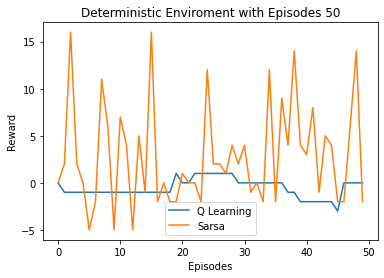

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  50  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  50  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


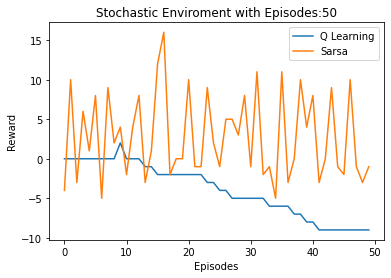

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  100  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  100  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


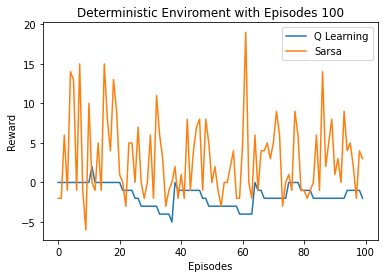

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  100  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  100  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


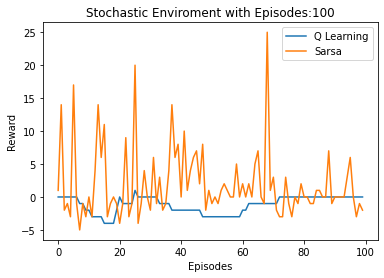

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  250  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  250  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


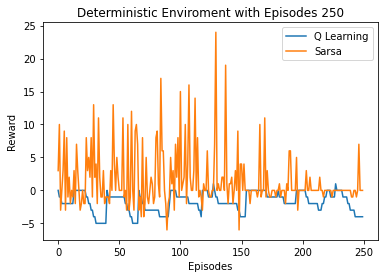

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  250  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  250  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


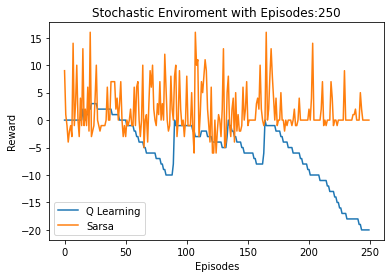

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  500  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  500  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


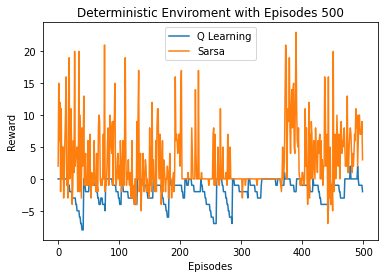

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  500  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  500  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


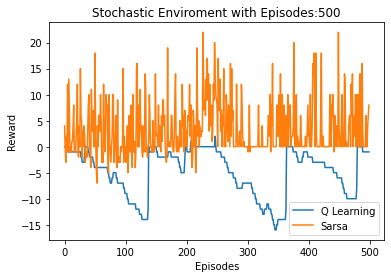

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  1000  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  1000  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


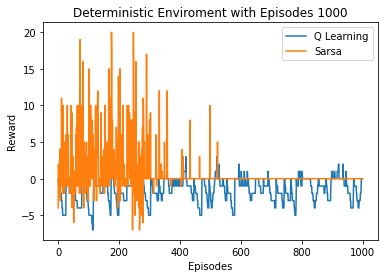

gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  1000  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.6
we will train for  1000  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0
training


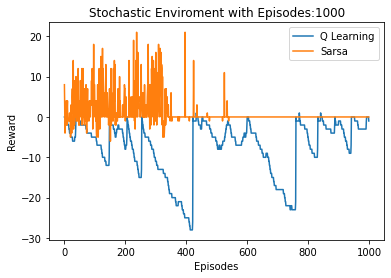

In [182]:
#vizualise()

## Varrying learning rate alpha and discount factor gamma values for q learning and sarsa

In [191]:
'''
#commented to avoid different result on each load of notebook

def hyperpara_tuning():

    alpha_val=[0.3,0.5,0.7,0.9]
    gamma_val=[0.25,0.4,0.6,0.8]


    for alpha in alpha_val:
        for gamma in gamma_val:
            print("Alpha Value ", alpha, "Gamma Value", gamma )
            environment_q_learning_obj = GridEnvironment(gamma = gamma, epsilon =0.9 , epsilonDecay=0.01 , alpha=alpha, num_episodes = 200, max_timesteps=25, is_stochastic=True,count=0)
            environment_q_learning_obj.train()
            plt.plot(environment_q_learning_obj.rewardPerEpisode)
            plt.title("Total Reward per episode")
            plt.show()
            
'''

Alpha Value  0.3 Gamma Value 0.25
gamma or discount factor we are using 0.25
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.3
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


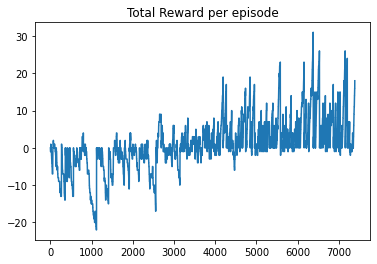

Alpha Value  0.3 Gamma Value 0.4
gamma or discount factor we are using 0.4
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.3
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


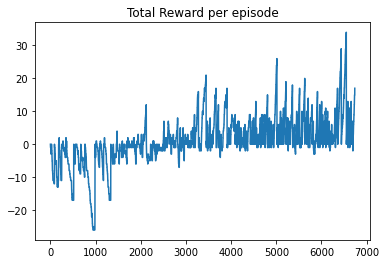

Alpha Value  0.3 Gamma Value 0.6
gamma or discount factor we are using 0.6
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.3
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


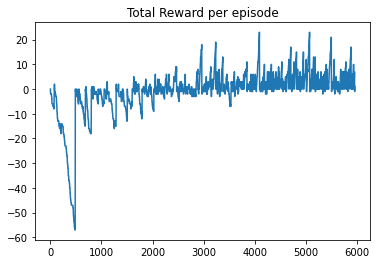

Alpha Value  0.3 Gamma Value 0.8
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.3
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


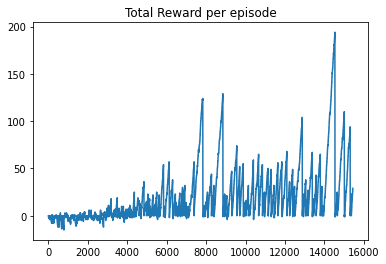

Alpha Value  0.5 Gamma Value 0.25
gamma or discount factor we are using 0.25
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.5
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


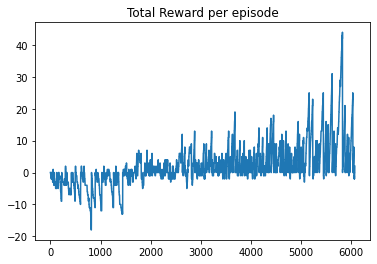

Alpha Value  0.5 Gamma Value 0.4
gamma or discount factor we are using 0.4
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.5
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


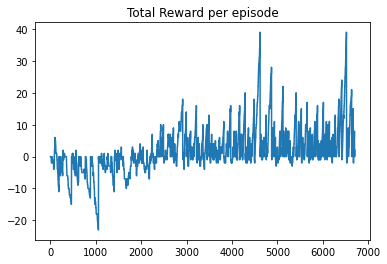

Alpha Value  0.5 Gamma Value 0.6
gamma or discount factor we are using 0.6
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.5
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


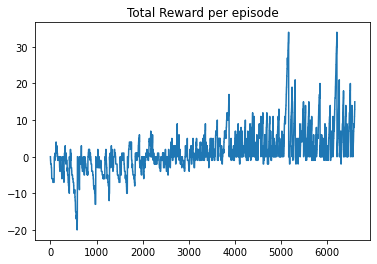

Alpha Value  0.5 Gamma Value 0.8
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.5
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


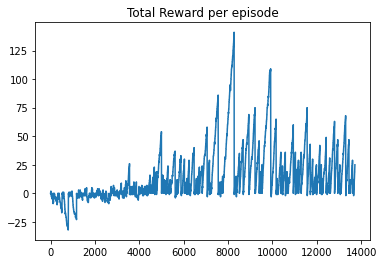

Alpha Value  0.7 Gamma Value 0.25
gamma or discount factor we are using 0.25
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.7
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


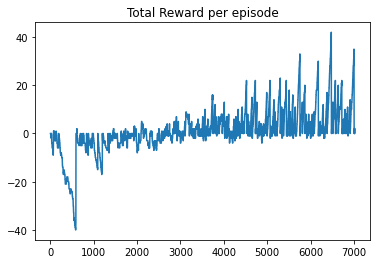

Alpha Value  0.7 Gamma Value 0.4
gamma or discount factor we are using 0.4
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.7
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


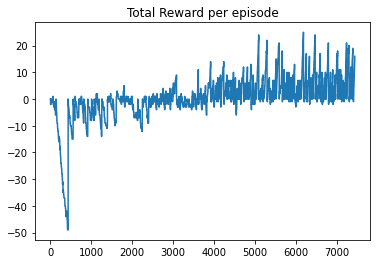

Alpha Value  0.7 Gamma Value 0.6
gamma or discount factor we are using 0.6
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.7
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


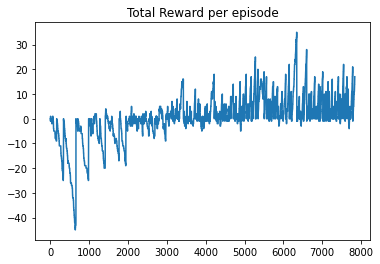

Alpha Value  0.7 Gamma Value 0.8
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.7
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


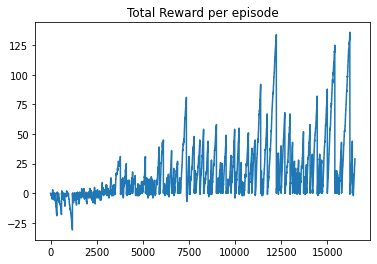

Alpha Value  0.9 Gamma Value 0.25
gamma or discount factor we are using 0.25
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.9
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


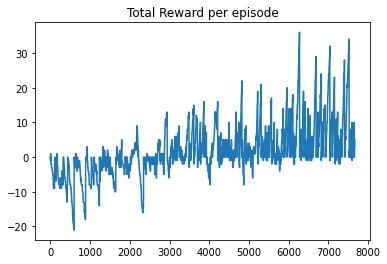

Alpha Value  0.9 Gamma Value 0.4
gamma or discount factor we are using 0.4
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.9
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


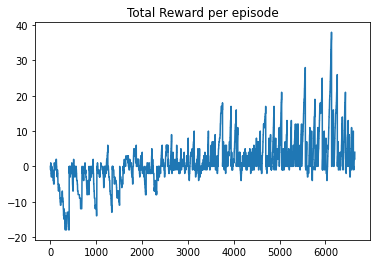

Alpha Value  0.9 Gamma Value 0.6
gamma or discount factor we are using 0.6
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.9
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


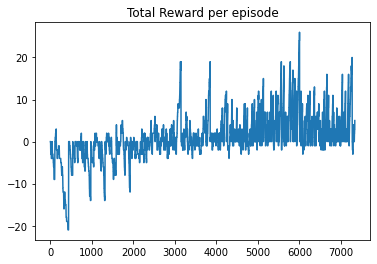

Alpha Value  0.9 Gamma Value 0.8
gamma or discount factor we are using 0.8
epsilon or degree of randomness we are using 0.9
As we learn about the appropiate actions in our Q table we decrease the stochasticity i.e. the epsilon value 
epsilon decay we are using is  0.9
Learning rate alpha we are using is 0.9
we will train for  200  and the max actions in a episode berfore termination is 25
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Our Rewards corresponding to different states 0


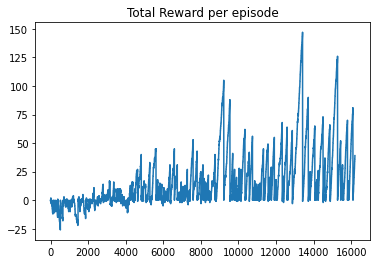

In [192]:
#hyperpara_tuning()

# Github Repository Link

[link](https://github.com/namantejaswi/Reinforcement_Learning_HW)